In [1]:
#Importing the necessary datasets

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#Loading the dataset

df = pd.read_csv('D:\\DataScience\\Term 1\\8.IML\\1.Assignments\\1.Assigment for midterm\\34 Challa Vighnesh_DataSets_input\\Cars.csv')

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
#There are null values in the columns Engine HP,Engine Cylinders,Number of doors,Market Category

In [8]:
#Dropping the irrelavant rows

df = df.drop('Market Category',axis = 1)

In [9]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [10]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


<Axes: xlabel='Make'>

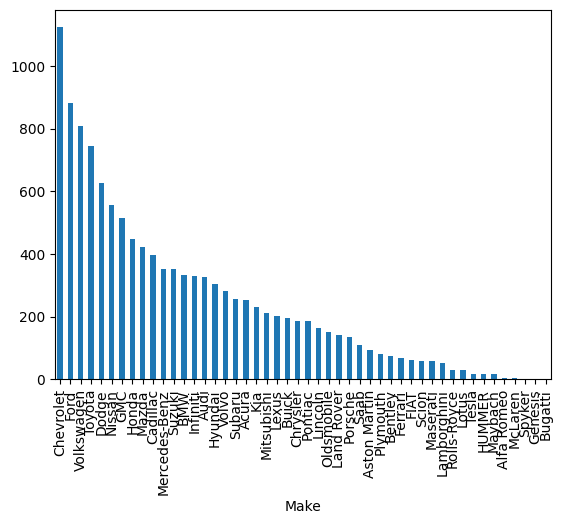

In [13]:
#Value_count analysis

df['Make'].value_counts().plot(kind = 'bar')

In [14]:
#Chevrolet being the most common brand

In [15]:
df['Year'].value_counts()

Year
2015    2170
2016    2157
2017    1668
2014     589
2012     387
2009     379
2013     366
2008     349
2007     345
2010     298
2011     285
2003     238
2004     235
2005     213
1993     209
2006     205
2002     205
1992     177
1997     175
2001     168
1994     163
1998     154
1991     152
1995     135
1996     131
1990     123
1999     120
2000     118
Name: count, dtype: int64

In [18]:
df.shape

(11914, 15)

In [17]:
pd.crosstab(index = df['Transmission Type'],columns = df['Engine Fuel Type'])

Engine Fuel Type,diesel,electric,flex-fuel (premium unleaded recommended/E85),flex-fuel (premium unleaded required/E85),flex-fuel (unleaded/E85),flex-fuel (unleaded/natural gas),natural gas,premium unleaded (recommended),premium unleaded (required),regular unleaded
Transmission Type,,,,,,,,,,
AUTOMATED_MANUAL,39,0,0,0,9,0,0,255,284,39
AUTOMATIC,86,0,19,54,845,6,2,870,1244,5137
DIRECT_DRIVE,0,66,0,0,0,0,0,0,0,2
MANUAL,29,0,7,0,45,0,0,398,481,1975
UNKNOWN,0,0,0,0,0,0,0,0,0,19


In [19]:
#The datset has regular unleaded with automatic transmission type has approximately 50% values

In [23]:
pd.crosstab(index = df['Transmission Type'],columns = df['Driven_Wheels'])

Driven_Wheels,all wheel drive,four wheel drive,front wheel drive,rear wheel drive
Transmission Type,,,,
AUTOMATED_MANUAL,198,0,304,124
AUTOMATIC,1940,1056,3056,2214
DIRECT_DRIVE,11,0,43,14
MANUAL,204,345,1380,1006
UNKNOWN,0,2,4,13


In [30]:
df[['highway MPG','city mpg','MSRP','Engine HP']].groupby(df['Driven_Wheels']).mean()

,highway MPG,city mpg,MSRP,Engine HP
Driven_Wheels,,,,
all wheel drive,26.150446,19.096048,58693.884828,290.683355
four wheel drive,19.789736,15.068425,35312.039914,274.975766
front wheel drive,31.452058,23.675371,23056.747650,183.440110
rear wheel drive,22.990507,16.521507,55064.830317,302.999405


In [28]:
#Front wheel drive has typically better mileage when compared to other wheel driven types

In [32]:
pd.crosstab(index = df['Driven_Wheels'],columns = df['Vehicle Size'])

Vehicle Size,Compact,Large,Midsize
Driven_Wheels,,,
all wheel drive,646,438,1269
four wheel drive,407,737,259
front wheel drive,2491,389,1907
rear wheel drive,1220,1213,938


In [33]:
pd.crosstab(index = df['Driven_Wheels'],columns = df['Vehicle Style'])

Vehicle Style,2dr Hatchback,2dr SUV,4dr Hatchback,4dr SUV,Cargo Minivan,Cargo Van,Convertible,Convertible SUV,Coupe,Crew Cab Pickup,Extended Cab Pickup,Passenger Minivan,Passenger Van,Regular Cab Pickup,Sedan,Wagon
Driven_Wheels,,,,,,,,,,,,,,,,
all wheel drive,10,11,101,984,6,2,106,5,197,37,1,53,2,1,675,162
four wheel drive,2,69,7,496,0,0,0,15,0,346,300,4,0,156,5,3
front wheel drive,473,0,583,631,54,0,236,0,338,5,0,327,0,0,1783,357
rear wheel drive,21,58,11,377,11,93,451,9,676,293,322,33,126,235,585,70


<Axes: xlabel='Vehicle Style'>

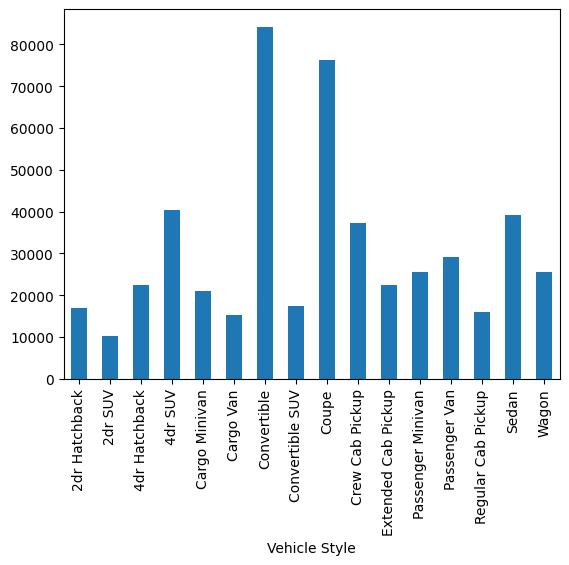

In [86]:
df['MSRP'].groupby(df['Vehicle Style']).mean().plot(kind = 'bar')

<Axes: xlabel='Driven_Wheels'>

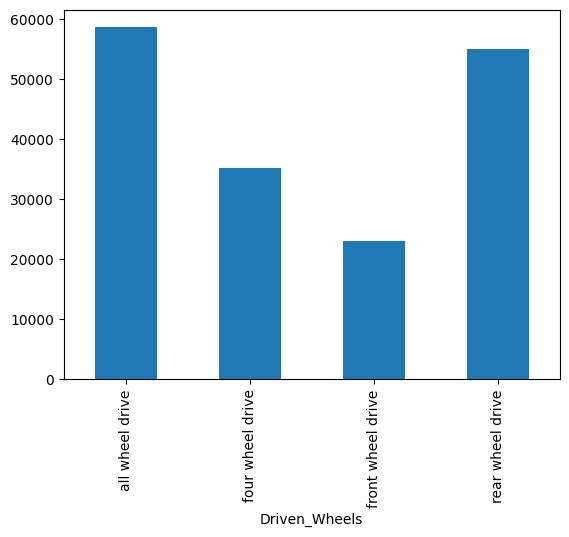

In [88]:
df['MSRP'].groupby(df['Driven_Wheels']).mean().plot(kind = 'bar')

In [102]:
df['MSRP'].groupby([df['Driven_Wheels'],df['Vehicle Style']]).mean()

Driven_Wheels      Vehicle Style      
all wheel drive    2dr Hatchback            9240.800000
                   2dr SUV                 35551.363636
                   4dr Hatchback           32109.603960
                   4dr SUV                 40842.668699
                   Cargo Minivan           25025.000000
                   Cargo Van               32760.000000
                   Convertible            166135.094340
                   Convertible SUV         47975.000000
                   Coupe                  153839.522843
                   Crew Cab Pickup         38490.810811
                   Extended Cab Pickup     38370.000000
                   Passenger Minivan       27812.132075
                   Passenger Van           34525.000000
                   Regular Cab Pickup       5667.000000
                   Sedan                   54452.355556
                   Wagon                   37358.648148
four wheel drive   2dr Hatchback            2000.000000
         

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MSRP', ylabel='Count'>

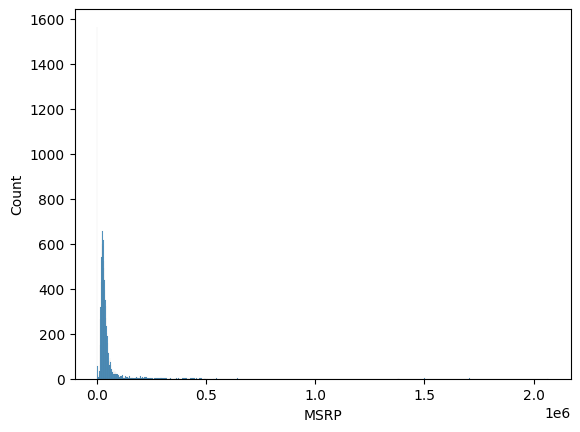

In [34]:
#Univariate analysis on price

sns.histplot(df["MSRP"])

In [36]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: ylabel='Count'>

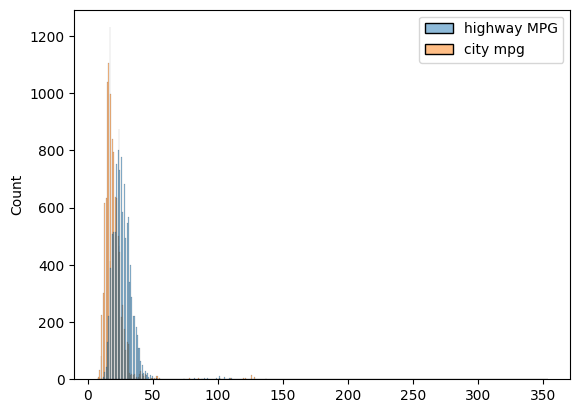

In [39]:
#Distribution of city mileage and highway mileage

sns.histplot(df[['highway MPG','city mpg']])

In [40]:
#The city mileage is more concentrated when compared with the highway mileage.City mileage is lower than the highway mileage

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


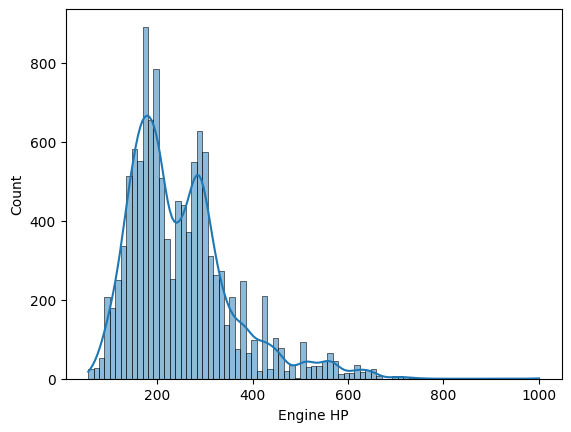

In [52]:
sns.histplot(df['Engine HP'],kde = True)
plt.show()

In [43]:
#The engine HP is a right skewed one with mode at somewhere between 150-200HP

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


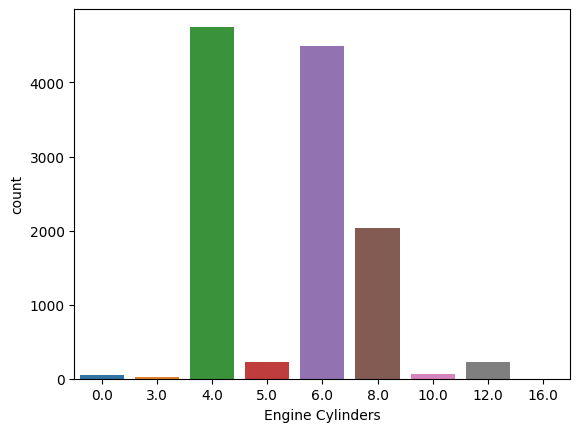

In [51]:
sns.countplot(data = df,x = 'Engine Cylinders')
plt.show()

In [50]:
#The four cylinders is most popular in the dataset

In [53]:
#Bivariate analysis

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Engine HP', ylabel='city mpg'>

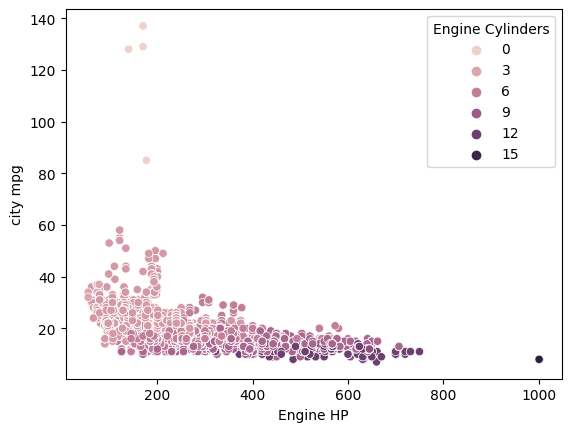

In [58]:
sns.scatterplot(data = df,x = 'Engine HP',y='city mpg',hue = 'Engine Cylinders')

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Engine HP', ylabel='highway MPG'>

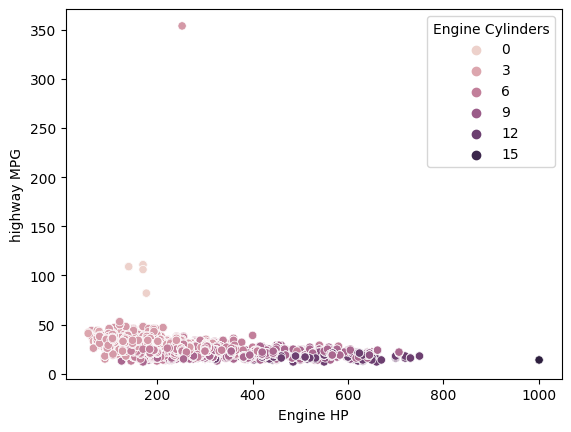

In [62]:
sns.scatterplot(data = df,x = 'Engine HP',y='highway MPG',hue = 'Engine Cylinders')

In [63]:
#As the power of the engine increases, the mileage is decreasing

<Axes: xlabel='Driven_Wheels'>

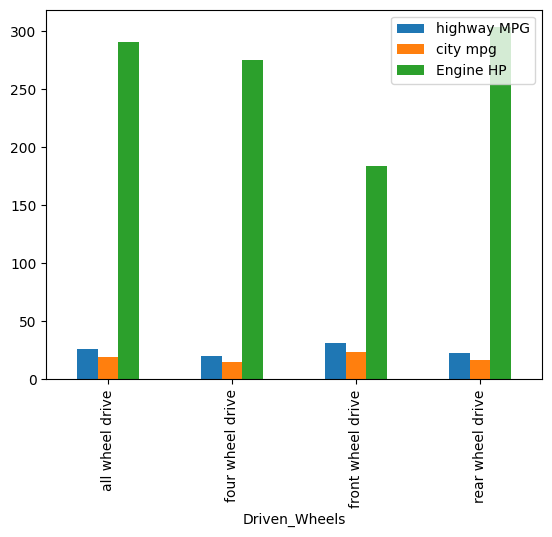

In [65]:
df[['highway MPG','city mpg','Engine HP']].groupby(df['Driven_Wheels']).mean().plot(kind = 'bar')

In [66]:
#All though the avg engine HP for rear wheel drive category is higher than the four wheel drive, the mileage from the rear wheel driven is more than the four wheeldrive

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Engine HP', ylabel='MSRP'>

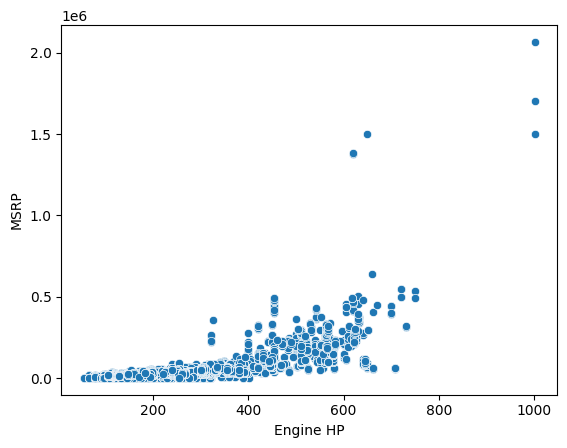

In [67]:
sns.scatterplot(data = df,x = 'Engine HP',y = 'MSRP')

In [68]:
#There is a positive correlation b/w price and power

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='highway MPG', ylabel='MSRP'>

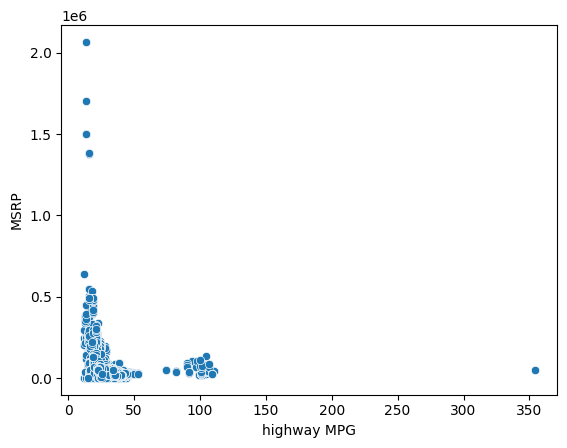

In [70]:
sns.scatterplot(data = df,x = 'highway MPG',y = 'MSRP')

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


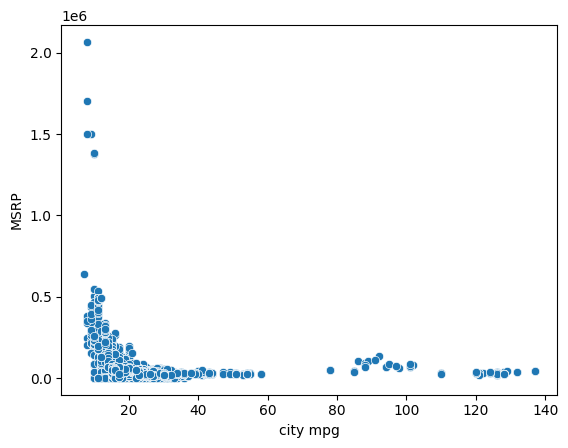

In [103]:
sns.scatterplot(data = df,x = 'city mpg',y = 'MSRP')
plt.show()

In [73]:
#There is no strong correlation b/w mileage and price

In [75]:
df.select_dtypes(include = 'number').corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
Engine Cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
Number of Doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway MPG,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


<Axes: >

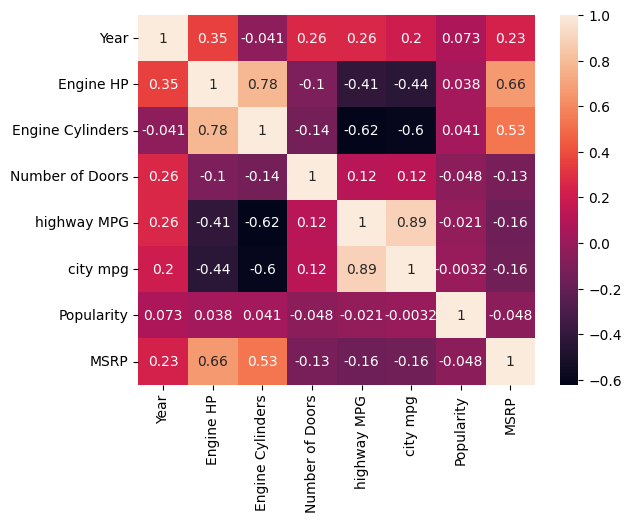

In [76]:
sns.heatmap(data = df.select_dtypes(include = 'number').corr(),annot = True)

In [77]:
#Data cleaning

In [81]:
#Removing the irrelavant columns

df = df.drop(['Model'],axis = 1)

In [82]:
df.head()

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [104]:
#Dropping Engine Fuel type too

df = df.drop('Engine Fuel Type',axis = 1)

In [105]:
df.head()

,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [106]:
#Dropping null values

df=df.dropna()

In [107]:
df.shape

(11815, 12)

In [109]:
#using elapsed years instead of Year

df['elapsed_years'] = 2023-df['Year']

In [111]:
df = df.drop('Year',axis = 1)

In [112]:
df.head()

,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,elapsed_years
0,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,12
1,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,12
2,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,12
3,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,12
4,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,12


In [258]:
df_num = df.select_dtypes(include = 'number')

In [259]:
#Outlier filter

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [260]:
lower_bound

Engine HP              2.5
Engine Cylinders       1.0
Number of Doors        4.0
highway MPG           11.0
city mpg               5.5
Popularity         -1574.0
MSRP                -770.0
elapsed_years         -3.5
dtype: float64

In [261]:
upper_bound

Engine HP             462.5
Engine Cylinders        9.0
Number of Doors         4.0
highway MPG            43.0
city mpg               33.5
Popularity           3906.0
MSRP                63270.0
elapsed_years          24.5
dtype: float64

In [262]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [263]:
df.shape

(6284, 12)

In [264]:
df_num.columns

Index(['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP', 'elapsed_years'],
      dtype='object')

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Engine HP'>

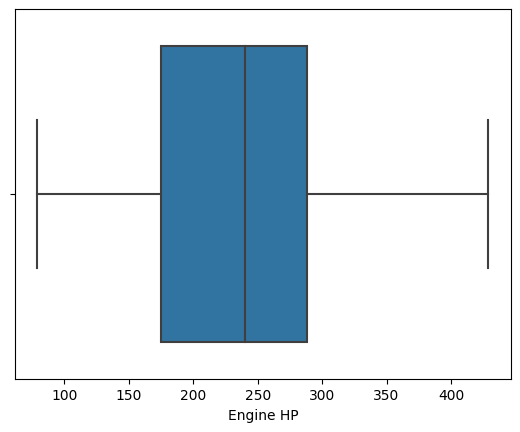

In [265]:
sns.boxplot(data = df,x = 'Engine HP')

In [266]:
df.head()

,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,elapsed_years
64,184.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,36,23,1013,25170,8
65,184.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,36,23,1013,23950,8
66,295.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Sedan,29,18,1013,29370,8
67,184.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,36,23,1013,21995,8
68,184.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,36,23,1013,26625,8


C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Engine HP'>

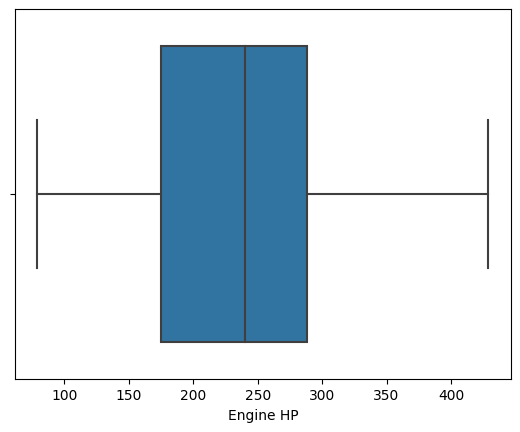

In [267]:
sns.boxplot(data= df,x = 'Engine HP')

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Engine Cylinders'>

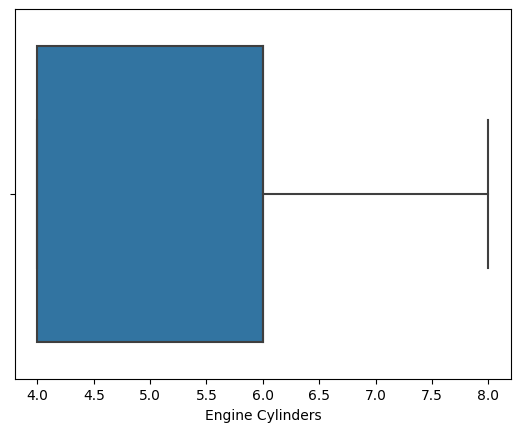

In [268]:
sns.boxplot(data = df,x = 'Engine Cylinders')

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='highway MPG'>

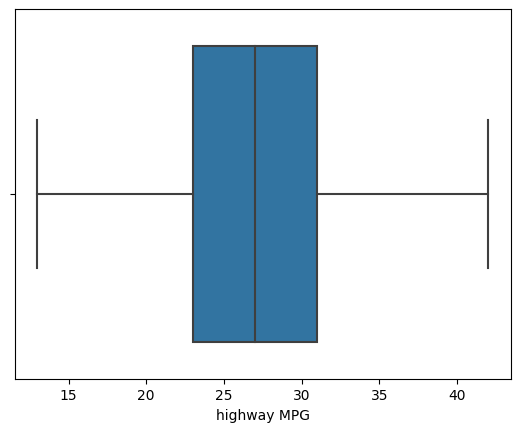

In [269]:
sns.boxplot(data = df,x = 'highway MPG')

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='city mpg'>

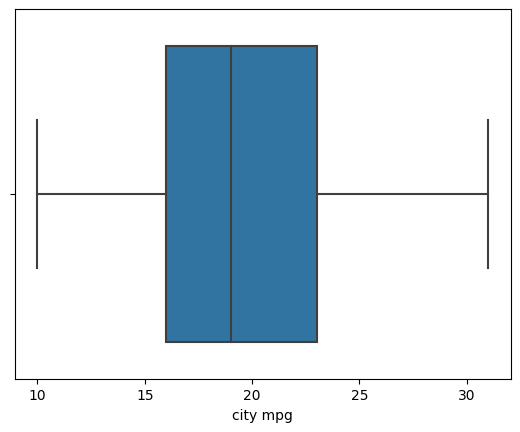

In [270]:
sns.boxplot(data = df,x = 'city mpg')

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='MSRP'>

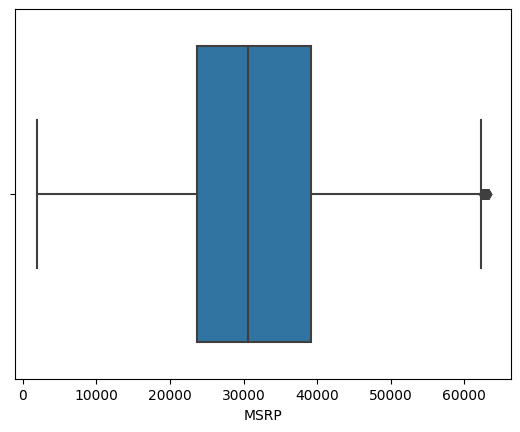

In [271]:
sns.boxplot(data = df,x = 'MSRP')

In [272]:
X = df.drop('MSRP',axis  =1)
y = df['MSRP']
X_num = X.select_dtypes(include = 'number')
X_cat = X.select_dtypes(include = 'object')

In [273]:
X_num.head()

,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,elapsed_years
64,184.0,4.0,4.0,36,23,1013,8
65,184.0,4.0,4.0,36,23,1013,8
66,295.0,6.0,4.0,29,18,1013,8
67,184.0,4.0,4.0,36,23,1013,8
68,184.0,4.0,4.0,36,23,1013,8


In [274]:
X_cat.head()

,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
64,AUTOMATIC,front wheel drive,Midsize,Sedan
65,AUTOMATIC,front wheel drive,Midsize,Sedan
66,AUTOMATIC,all wheel drive,Midsize,Sedan
67,AUTOMATIC,front wheel drive,Midsize,Sedan
68,AUTOMATIC,front wheel drive,Midsize,Sedan


In [275]:
X_num_scaled = MinMaxScaler().fit_transform(X_num)

In [276]:
X_num_scaled = pd.DataFrame(X_num_scaled,columns = X_num.columns,index = X_num.index)

In [277]:
X_num_scaled.head()

,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,elapsed_years
64,0.300000,0.0,0.0,0.793103,0.619048,0.32166,0.111111
65,0.300000,0.0,0.0,0.793103,0.619048,0.32166,0.111111
66,0.617143,0.5,0.0,0.551724,0.380952,0.32166,0.111111
67,0.300000,0.0,0.0,0.793103,0.619048,0.32166,0.111111
68,0.300000,0.0,0.0,0.793103,0.619048,0.32166,0.111111


In [278]:
X_cat_encoded = pd.get_dummies(X_cat,drop_first = False,dtype=int)

In [279]:
X_cat_encoded

,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_MANUAL,Driven_Wheels_all wheel drive,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Vehicle Size_Compact,Vehicle Size_Large,Vehicle Size_Midsize,Vehicle Style_4dr Hatchback,Vehicle Style_4dr SUV,Vehicle Style_Cargo Minivan,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Sedan,Vehicle Style_Wagon
64,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
65,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
66,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
67,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
68,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
11910,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
11911,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
11912,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [280]:
X = pd.concat([X_num_scaled,X_cat_encoded],axis=1)

In [281]:
X.shape

(6284, 25)

In [282]:
X.head()

,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,elapsed_years,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_MANUAL,...,Vehicle Size_Large,Vehicle Size_Midsize,Vehicle Style_4dr Hatchback,Vehicle Style_4dr SUV,Vehicle Style_Cargo Minivan,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Sedan,Vehicle Style_Wagon
64,0.300000,0.0,0.0,0.793103,0.619048,0.32166,0.111111,0,1,0,...,0,1,0,0,0,0,0,0,1,0
65,0.300000,0.0,0.0,0.793103,0.619048,0.32166,0.111111,0,1,0,...,0,1,0,0,0,0,0,0,1,0
66,0.617143,0.5,0.0,0.551724,0.380952,0.32166,0.111111,0,1,0,...,0,1,0,0,0,0,0,0,1,0
67,0.300000,0.0,0.0,0.793103,0.619048,0.32166,0.111111,0,1,0,...,0,1,0,0,0,0,0,0,1,0
68,0.300000,0.0,0.0,0.793103,0.619048,0.32166,0.111111,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [283]:
y.shape

(6284,)

In [284]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [285]:
#knn implementation

k_values = np.arange(1,21,2)
train_mape_values = []
test_mape_values = []
cv_mape_values = []

In [286]:
k_values

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [287]:
for i in k_values:
    #Training the dataset on the X_train and y_train
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train,y_train)
    
    #Predicting the y_train and cal the error
    pred_train = model.predict(X_train)
    error_train = mean_absolute_percentage_error(y_train,pred_train)
    train_mape_values.append(error_train)
    
    #Predicting the y_test values using the X_test and cal the error
    pred_test = model.predict(X_test)
    error_test = mean_absolute_percentage_error(y_test,pred_test)
    test_mape_values.append(error_test)
    
    #using CV calues
    cv_scores = -cross_val_score(model,X,y,cv = 5,scoring = 'neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_values.append(cv_mape)

In [288]:
train_mape_values

[0.05146053574135138,
 0.09123979852200155,
 0.13054665502043328,
 0.15666020041933296,
 0.179747787866736,
 0.19722592564198346,
 0.21082360484065563,
 0.22263657670170692,
 0.23120850695255246,
 0.23754693399728757]

In [289]:
test_mape_values

[0.13321158771036753,
 0.1433343888549213,
 0.16463200828262822,
 0.1843748739087154,
 0.20022417206384824,
 0.21249061153555945,
 0.22109832297589105,
 0.2277788680073276,
 0.23212815442576137,
 0.2387278125125696]

In [290]:
cv_mape_values

[0.30062018287226355,
 0.31219286328080165,
 0.31001741471808975,
 0.3130965326842688,
 0.31374076045281,
 0.31504081575633097,
 0.3170119424534653,
 0.31823943961621054,
 0.318885219754387,
 0.3200661665911667]

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

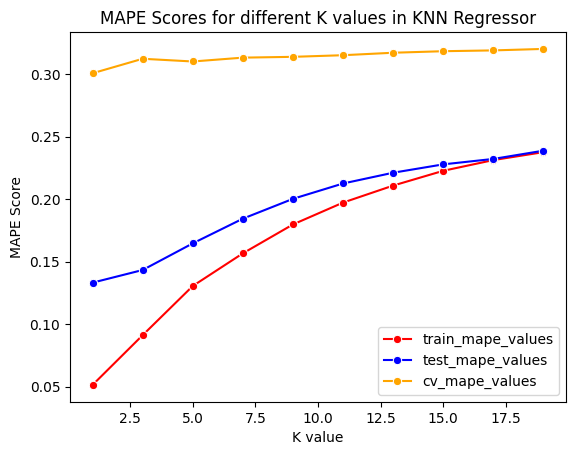

The best k_value:  1


In [291]:
sns.lineplot(x = k_values,y = train_mape_values,marker = 'o',color = 'Red',label = 'train_mape_values')
sns.lineplot(x = k_values,y = test_mape_values,marker = 'o',color = 'blue',label = 'test_mape_values')
sns.lineplot(x=k_values,y = cv_mape_values,marker = 'o',color = 'orange',label = 'cv_mape_values')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

#best_cv_value_is
best_k_cv = k_values[np.argmin(cv_mape_values)]
print("The best k_value: ",best_k_cv)